In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils.utils import load_df
from utils.plots import plot_perf, plot_train_convergence, plot_spec_metric, plot_spec_metric_2
from pathlib import Path

sns.set()

palette = {"incremental": "orange", "baseline" : "blue"}
hue_order = ['baseline', 'incremental']
hue = 'curriculum_setting'
hue_settings = {"hue": hue, "palette": palette, "hue_order": hue_order}

BASE_DIR = Path('results/curriculum_set2and3')
FIG_DIR = Path('figures/curriculum_set2and3')


/home/mila/o/omar.salemohamed/.virtualenvs/modular_curriculum/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


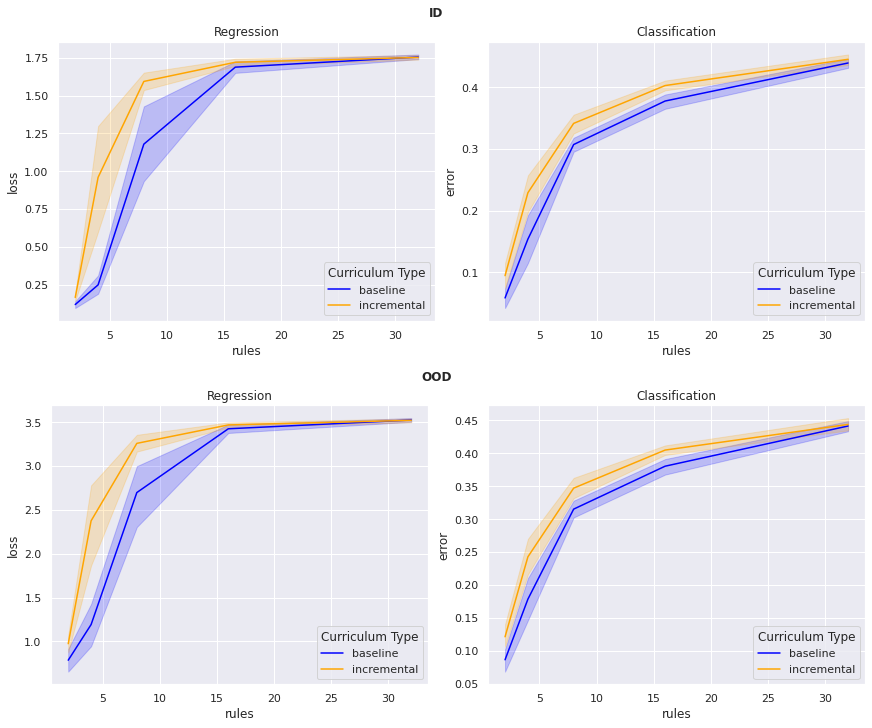

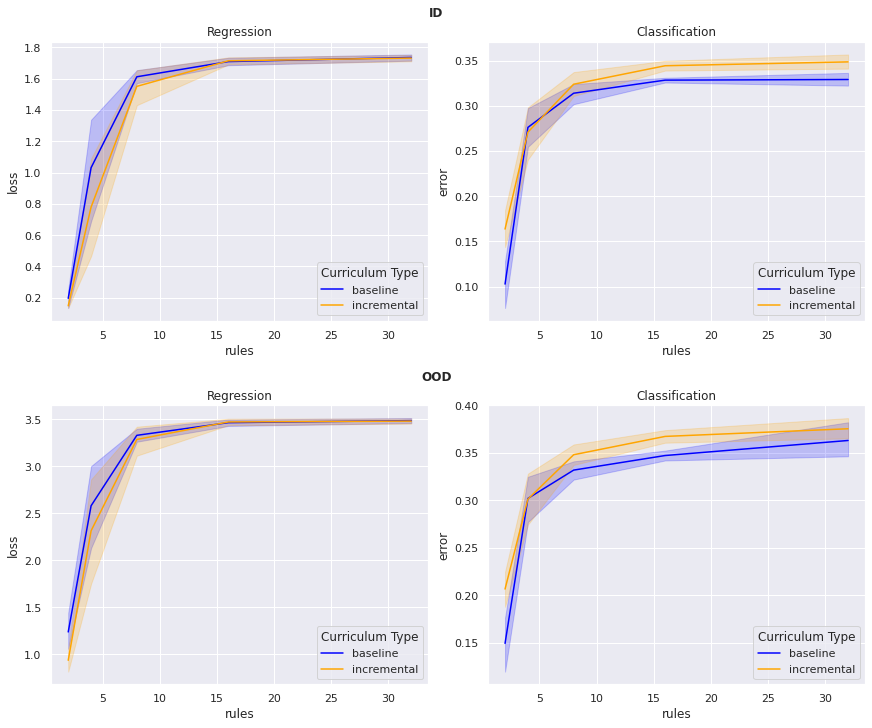

In [2]:
df = load_df(BASE_DIR / 'eval_results.pk')
df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
df = df.loc[df['setting'] == 'mod_dich']
df = df.loc[df['seq_len'] == 10]  # Only look at train seq_len
df = df.loc[df['n_op'] < 64]  
plot_perf(df, save_path=(FIG_DIR / 'perf_mod_dich.png'), **hue_settings)


df = load_df(BASE_DIR / 'eval_results.pk')

df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
df = df.loc[df['setting'] == 'mod']
df = df.loc[df['seq_len'] == 10]  # Only look at train seq_len
df = df.loc[df['n_op'] < 64]  
plot_perf(df, save_path=(FIG_DIR / 'perf_mod.png'), **hue_settings)


(<Figure size 864x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Regression'}, xlabel='# Rules', ylabel='Adaptation'>,
        <AxesSubplot:title={'center':'Classification'}, xlabel='# Rules', ylabel='Adaptation'>],
       dtype=object))

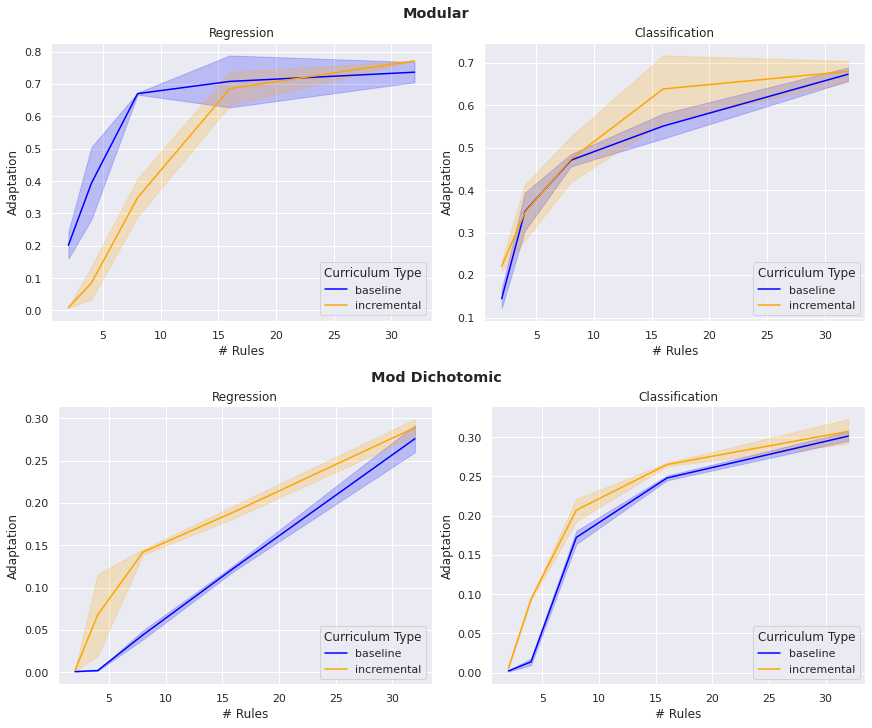

In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

df = load_df(BASE_DIR / 'spec_results.pk')
df = df.loc[(df['seq_len'] == 10)]
df = df.loc[df['n_op'] < 64] 
df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
df = df.groupby(by=['n_op', 'type', 'setting',
                'curriculum_setting', 'model', 'x_dim'], as_index=False).mean()

plot_spec_metric_2(df, y='spec', ylabel='Adaptation', save_path=(
    FIG_DIR / 'adapt.png'), **hue_settings)


(<Figure size 864x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Regression'}, xlabel='# Rules', ylabel='Alignment'>,
        <AxesSubplot:title={'center':'Classification'}, xlabel='# Rules', ylabel='Alignment'>],
       dtype=object))

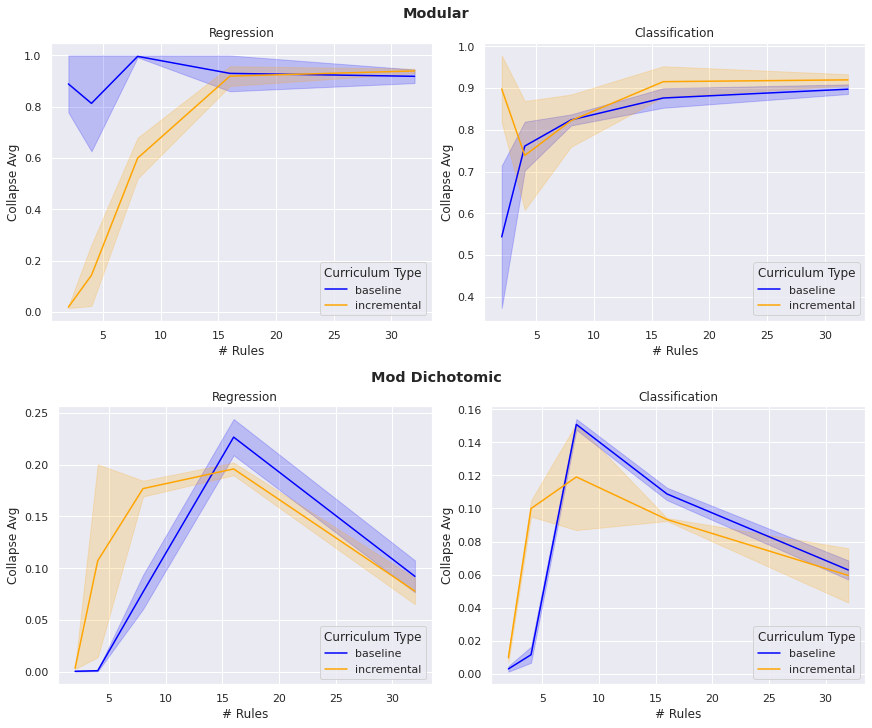

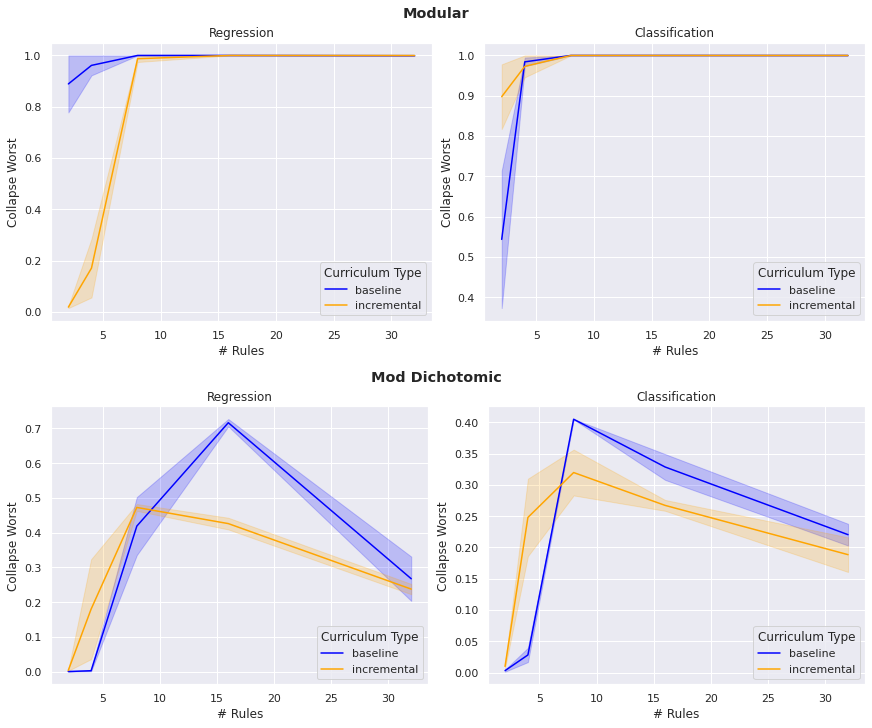

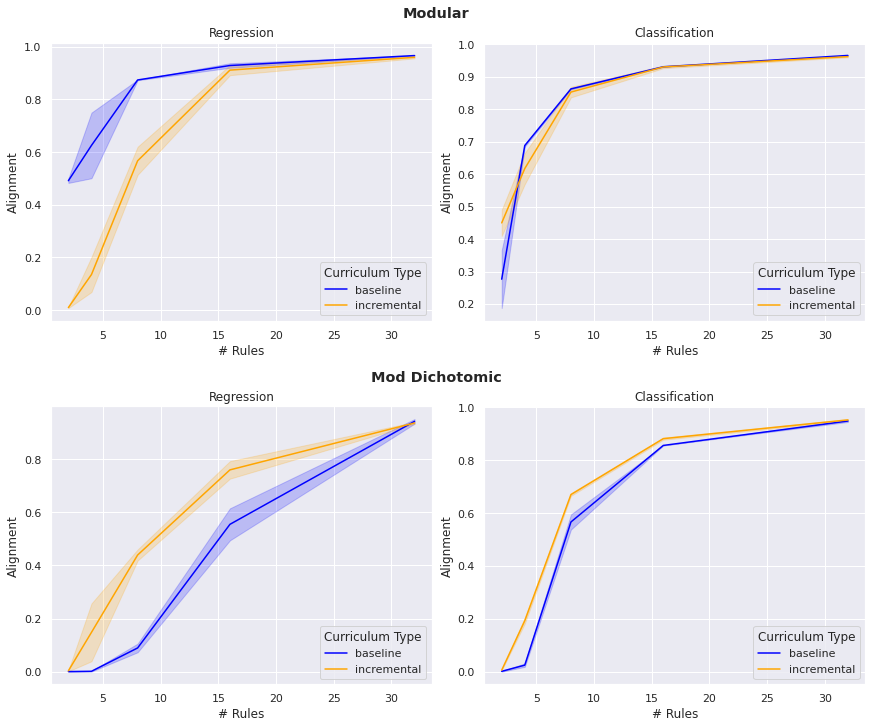

In [4]:

df = load_df(BASE_DIR / 'prob_results.pk')
df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
df = df.loc[(df['seq_len'] == 10)]
df = df.loc[df['n_op'] < 64]  
df = df.groupby(by=['n_op', 'type', 'setting',
                'curriculum_setting', 'model', 'x_dim'], as_index=False).mean()


plot_spec_metric_2(df=df, y='collapse_avg', ylabel='Collapse Avg', save_path=(
    FIG_DIR / 'collapse_avg.png'), **hue_settings)
plot_spec_metric_2(df=df, y='collapse_worst',
                   ylabel='Collapse Worst', save_path=(FIG_DIR / 'collapse_worst.png'), **hue_settings)
plot_spec_metric_2(df=df, y='hungarian', ylabel='Alignment',
                   save_path=(FIG_DIR / 'alignment.png'), **hue_settings)

